In [4]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In this notebook, we'll explore two common regularization techniques—weight regularization and dropout—and use them to improve our IMDB movie review classification notebook.

In [12]:
imdb=keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. The rare words are discarded to keep the size of the data manageable.

Rather than using an embedding as in the previous notebook, here we will multi-hot encode the sentences. This model will quickly overfit to the training set. It will be used to demonstrate when overfitting occurs, and how to fight it

In [13]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=10000)
test_data = multi_hot_sequences(test_data, dimension=10000)

In [14]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(10000,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 54s - loss: 0.4821 - acc: 0.7981 - binary_crossentropy: 0.4821 - val_loss: 0.3312 - val_acc: 0.8781 - val_binary_crossentropy: 0.3312
Epoch 2/20
 - 7s - loss: 0.2447 - acc: 0.9126 - binary_crossentropy: 0.2447 - val_loss: 0.2835 - val_acc: 0.8874 - val_binary_crossentropy: 0.2835
Epoch 3/20
 - 7s - loss: 0.1777 - acc: 0.9386 - binary_crossentropy: 0.1777 - val_loss: 0.2919 - val_acc: 0.8833 - val_binary_crossentropy: 0.2919
Epoch 4/20
 - 8s - loss: 0.1400 - acc: 0.9520 - binary_crossentropy: 0.1400 - val_loss: 0.3188 - val_acc: 0.8786 - val_binary_crossentropy: 0.3188
Epoch 5/20
 - 7s - loss: 0.1141 - acc: 0.9629 - binary_crossentropy: 0.1141 - val_loss: 0.3504 - val_acc: 0.8722 - val_binary_crossentropy: 0.3504
Epoch 6/20
 - 7s - loss: 0.0906 - acc: 0.9727 - binary_crossentropy: 0.0906 - val_loss: 0.3852 - val_acc: 0.8682 - val_binary_crossentropy: 0.3852
Epoch 7/20
 - 7s - loss: 0.0716 - acc: 0.9810 - binary_crossentropy

In [17]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [18]:
summary_history=smaller_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data,test_labels),
                                 verbose=2.0)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.5966 - acc: 0.7089 - binary_crossentropy: 0.5966 - val_loss: 0.5159 - val_acc: 0.8141 - val_binary_crossentropy: 0.5159
Epoch 2/20
 - 8s - loss: 0.4345 - acc: 0.8748 - binary_crossentropy: 0.4345 - val_loss: 0.4023 - val_acc: 0.8805 - val_binary_crossentropy: 0.4023
Epoch 3/20
 - 7s - loss: 0.3160 - acc: 0.9151 - binary_crossentropy: 0.3160 - val_loss: 0.3287 - val_acc: 0.8869 - val_binary_crossentropy: 0.3287
Epoch 4/20
 - 7s - loss: 0.2447 - acc: 0.9290 - binary_crossentropy: 0.2447 - val_loss: 0.2995 - val_acc: 0.8872 - val_binary_crossentropy: 0.2995
Epoch 5/20
 - 7s - loss: 0.2040 - acc: 0.9378 - binary_crossentropy: 0.2040 - val_loss: 0.2916 - val_acc: 0.8849 - val_binary_crossentropy: 0.2916
Epoch 6/20
 - 7s - loss: 0.1767 - acc: 0.9455 - binary_crossentropy: 0.1767 - val_loss: 0.2881 - val_acc: 0.8854 - val_binary_crossentropy: 0.2881
Epoch 7/20
 - 7s - loss: 0.1563 - acc: 0.9524 - binary_crossentropy:

In [20]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.3497 - acc: 0.8533 - binary_crossentropy: 0.3497 - val_loss: 0.3034 - val_acc: 0.8770 - val_binary_crossentropy: 0.3034
Epoch 2/20
 - 11s - loss: 0.1357 - acc: 0.9510 - binary_crossentropy: 0.1357 - val_loss: 0.3570 - val_acc: 0.8632 - val_binary_crossentropy: 0.3570
Epoch 3/20
 - 10s - loss: 0.0407 - acc: 0.9886 - binary_crossentropy: 0.0407 - val_loss: 0.4506 - val_acc: 0.8661 - val_binary_crossentropy: 0.4506
Epoch 4/20
 - 10s - loss: 0.0061 - acc: 0.9992 - binary_crossentropy: 0.0061 - val_loss: 0.5959 - val_acc: 0.8670 - val_binary_crossentropy: 0.5959
Epoch 5/20
 - 11s - loss: 7.6381e-04 - acc: 1.0000 - binary_crossentropy: 7.6381e-04 - val_loss: 0.6718 - val_acc: 0.8708 - val_binary_crossentropy: 0.6718
Epoch 6/20
 - 10s - loss: 4.3634e-04 - acc: 1.0000 - binary_crossentropy: 4.3634e-04 - val_loss: 0.7056 - val_acc: 0.8707 - val_binary_crossentropy: 0.7056
Epoch 7/20
 - 10s - loss: 6.1856e-04 - acc: 1.

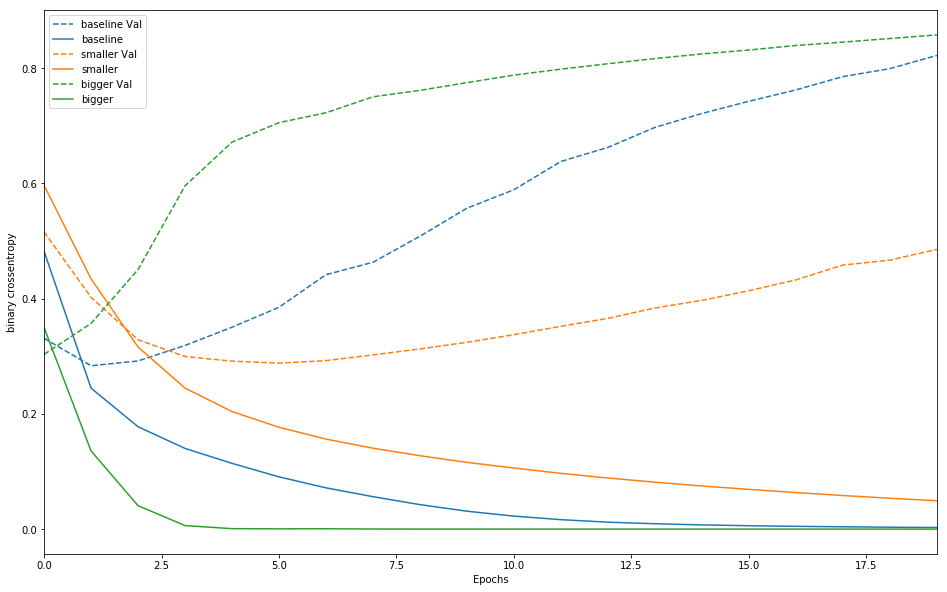

In [28]:
def plot(histories,key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name,history in histories:
        val=plt.plot(history.epoch,history.history['val_'+key],'--',label=name+' Val')
        plt.plot(history.epoch,history.history[key],color=val[0].get_color(),label=name)
        plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' '))
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.show()
    
plot([('baseline', baseline_history),
              ('smaller', summary_history),
              ('bigger', bigger_history)])

In [29]:
l2_model=keras.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu,input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.5356 - acc: 0.7954 - binary_crossentropy: 0.4946 - val_loss: 0.3916 - val_acc: 0.8762 - val_binary_crossentropy: 0.3498
Epoch 2/20
 - 7s - loss: 0.3145 - acc: 0.9082 - binary_crossentropy: 0.2684 - val_loss: 0.3378 - val_acc: 0.8867 - val_binary_crossentropy: 0.2882
Epoch 3/20
 - 7s - loss: 0.2616 - acc: 0.9269 - binary_crossentropy: 0.2094 - val_loss: 0.3367 - val_acc: 0.8858 - val_binary_crossentropy: 0.2827
Epoch 4/20
 - 7s - loss: 0.2356 - acc: 0.9386 - binary_crossentropy: 0.1800 - val_loss: 0.3458 - val_acc: 0.8829 - val_binary_crossentropy: 0.2889
Epoch 5/20
 - 7s - loss: 0.2217 - acc: 0.9451 - binary_crossentropy: 0.1634 - val_loss: 0.3590 - val_acc: 0.8797 - val_binary_crossentropy: 0.2998
Epoch 6/20
 - 7s - loss: 0.2088 - acc: 0.9508 - binary_crossentropy: 0.1487 - val_loss: 0.3709 - val_acc: 0.8771 - val_binary_crossentropy: 0.3104
Epoch 7/20
 - 7s - loss: 0.2015 - acc: 0.9531 - binary_crossentropy:

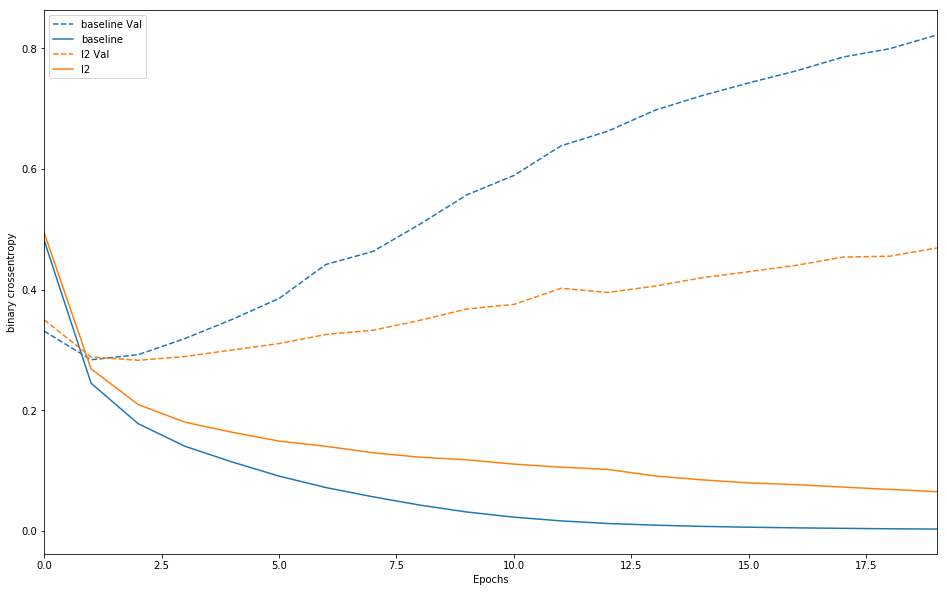

In [30]:
plot([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [32]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.6233 - acc: 0.6423 - binary_crossentropy: 0.6233 - val_loss: 0.4943 - val_acc: 0.8531 - val_binary_crossentropy: 0.4943
Epoch 2/20
 - 7s - loss: 0.4514 - acc: 0.8061 - binary_crossentropy: 0.4514 - val_loss: 0.3475 - val_acc: 0.8810 - val_binary_crossentropy: 0.3475
Epoch 3/20
 - 7s - loss: 0.3509 - acc: 0.8715 - binary_crossentropy: 0.3509 - val_loss: 0.2993 - val_acc: 0.8868 - val_binary_crossentropy: 0.2993
Epoch 4/20
 - 7s - loss: 0.2961 - acc: 0.8990 - binary_crossentropy: 0.2961 - val_loss: 0.2806 - val_acc: 0.8879 - val_binary_crossentropy: 0.2806
Epoch 5/20
 - 7s - loss: 0.2535 - acc: 0.9223 - binary_crossentropy: 0.2535 - val_loss: 0.2832 - val_acc: 0.8880 - val_binary_crossentropy: 0.2832
Epoch 6/20
 - 7s - loss: 0.2216 - acc: 0.9350 - binary_crossentropy: 0.2216 - val_loss: 0.2925 - val_acc: 0.8850 - val_binary_crossentropy: 0.2925
Epoch 7/20
 - 7s - loss: 0.1983 - acc: 0.9438 - binary_crossentropy

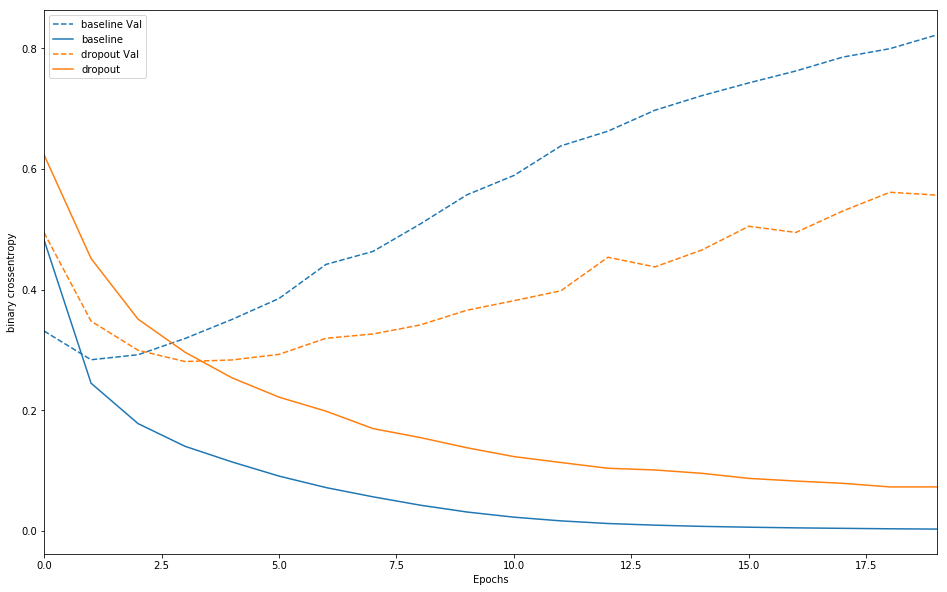

In [33]:
plot([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

To recap: here the most common ways to prevent overfitting in neural networks:

1.Get more training data.

2.Reduce the capacity of the network.

3.Add weight regularization.

4.Add dropout.

And two important approaches not covered in this guide are data-augmentation and batch normalization.